# Assessed Problem #3

The function f(t) represents a square-wave with amplitude 1 and frequency
1 Hz:
$$f(t) = \Bigg\{\begin{matrix}
    \ +1 \ \ \ \ \ \ \ \ \ \ \ \ \ \  if \ \lfloor 2t \rfloor \ is \ even \  \\
    -1 \ \ \ \ \ \ \ \ \ \ \ \ \ \  if \ \lfloor 2t \rfloor \ is \ odd
\end{matrix}$$
where $\lfloor x \rfloor$ means $x$ rounded down to the next lowest integer. Let us attempt
to smooth this function using a Fourier transform.

To define this function in python I will be using an if\else statement to seperate the two criteria, however I have found that using this method makes it more difficult to create lists since the function cannot evaluate every element of the array at the same time, to overcome this you can either evaluate each element individually then reconstruct the array afterwards or you can map the function onto it's outputs then parse the map back into a list. In this method I chose to evaluate each element individually because it's a method I'm more familiar with (I'm also certain there are other ways of doing this but These are the only two I'm aware of in Python).

# Computation Box

In [4]:
#Libraries
from numpy import arange, sin, pi
from numpy.fft import rfft, irfft
from matplotlib.pyplot import plot, show, legend, title, xlabel, ylabel, xlim
#

#Subroutines
def SqWave(t):                                  #Defines the square-wave function described in the problem:
    for i in range(len(t)):                     #For each value of the array
        if sin(t[i]*2*pi)%2 < 1: t[i] =  1      #if The sine(2pi*t) function has a remainder from two less than one then floor(2t) is even
        else:                                   #if not 
            if sin(t[i]*2*pi)%2 > 1: t[i] = -1  #test if the sine(2pi*t) function has a remainder more than one then floor(2t) is odd
            else: t[i] = t[i-1]                 #unless t[i] is a value of (2n+1)pi where it should continue the trend of what value came before it
                                                #this is an unwanted side affect of how I defined the function. It doesn't affect the calculation
                                                #but has made the function a little harder to understand intuitively
    return t                                    #Returns the modified array


def SetToZero(A,n):                             #Returns the input array 'A' with all values but the first 'n' terms set to zero
    for i in range(len(A)-n): 
        A[i+n] = 0
    return A
#

N = 1000.                                                             #Number of values in the range
n = 1.                                                                #Maximum value of the range

# Output and Discussion

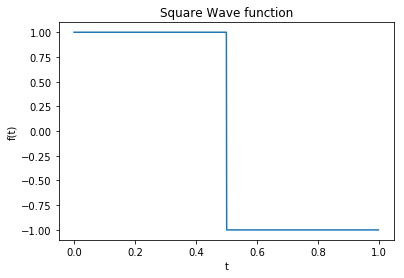

In [5]:

plot(arange(0,n,n/N),SqWave(arange(0,n,n/N)))                         #Plot the square wave function
title("Square Wave function")
xlabel("t")
ylabel("f(t)")
show()


as you can see the function defined follows the square wave described by the problem set, this verifies the accuracy of the function produced.

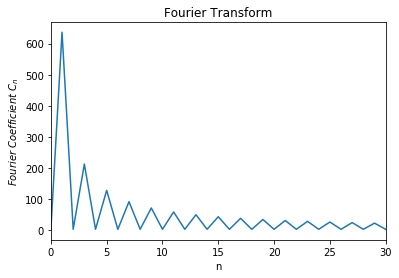

In [6]:

c=rfft(SqWave(arange(0,n,n/N)))                                       #Calculate the fourier coefficients of the square wave function in the range
plot(abs(c))                                                          #Plot the Fourier Coefficients
title("Fourier Transform")
xlabel("n")
ylabel("$Fourier \ Coefficient \ C_n$")
xlim(0,30)
show()

You can see that the fourier coefficients are zero if n is even. and they decay exponentially as n increases. Also as n increases they contribute less and less to the accuracy of the final equation, to demonstrate this we will now find the reverse of these fourier coefficients after the array has been compressed to only the first few values (once for 5 values, 10 values then 50).

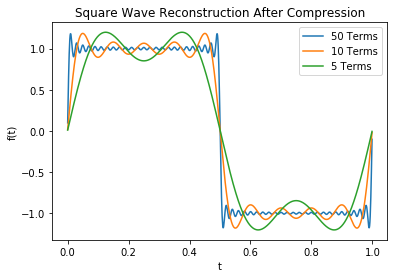

In [7]:
for i in [50,10,5]:                                                   #for each compressed array
    plot(arange(0,n,n/N),irfft(SetToZero(c,i)),label=str(i)+" Terms") #Reverse the fourier transform & plot the graph
title("Square Wave Reconstruction After Compression")
xlabel("t")
ylabel("f(t)")
legend()
show()